### Importing the libraries

In [477]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### Vrushali & Shubham contribution

##### Here we have a toal of 6 different datasets.

##### Loading the first dataset

In [478]:
df1 = pd.read_csv('city_day.csv')
df1.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [479]:
df1.shape[0]

29531

In [480]:
df1.shape

(29531, 16)

In [481]:
list_null_keys = list(df1.isnull().sum().index)

In [482]:
df1.isnull().sum().values

array([    0,     0,  4598, 11140,  3582,  3585,  4185, 10328,  2059,
        3854,  4022,  5623,  8041, 18109,  4681,  4681], dtype=int64)

In [483]:
list_null_values = []
for i in df1.isnull().sum().values:
    b = i/df1.shape[0] * 100
    list_null_values.append(b)

In [484]:
null_values_percentage = dict(zip(list_null_keys,list_null_values))

In [485]:
null_values_percentage

{'City': 0.0,
 'Date': 0.0,
 'PM2.5': 15.570078900138837,
 'PM10': 37.72307067149775,
 'NO': 12.129626494192543,
 'NO2': 12.139785310351833,
 'NOx': 14.17154854220988,
 'NH3': 34.97341776438319,
 'CO': 6.9723341573262,
 'SO2': 13.050692492634857,
 'O3': 13.619586197555112,
 'Benzene': 19.041007754563,
 'Toluene': 27.229013578950934,
 'Xylene': 61.32200060952897,
 'AQI': 15.851139480545868,
 'AQI_Bucket': 15.851139480545868}

In [486]:
# so, here we can see the % of missing values.

In [487]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


In [488]:
df1.tail()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
29526,Visakhapatnam,2020-06-27,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0,Good
29527,Visakhapatnam,2020-06-28,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0,Satisfactory
29528,Visakhapatnam,2020-06-29,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0,Satisfactory
29529,Visakhapatnam,2020-06-30,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,0.00,54.0,Satisfactory
29530,Visakhapatnam,2020-07-01,15.00,66.00,0.40,26.85,14.05,5.20,0.59,2.10,17.05,NaN,NaN,NaN,50.0,Good


In [489]:
# Fetching the Month from the column
df1['Date'] = pd.to_datetime(df1['Date']) 
df1['month'] = df1['Date'].dt.month

print(df1['month'])


0        1
1        1
2        1
3        1
4        1
        ..
29526    6
29527    6
29528    6
29529    6
29530    7
Name: month, Length: 29531, dtype: int64


In [490]:
df1['month'].value_counts()

5     2821
6     2811
3     2749
4     2702
1     2621
2     2457
12    2362
10    2263
11    2201
7     2196
8     2175
9     2173
Name: month, dtype: int64

In [491]:
df1.isnull().sum()

City              0
Date              0
PM2.5          4598
PM10          11140
NO             3582
NO2            3585
NOx            4185
NH3           10328
CO             2059
SO2            3854
O3             4022
Benzene        5623
Toluene        8041
Xylene        18109
AQI            4681
AQI_Bucket     4681
month             0
dtype: int64

In [492]:
data = df1[df1['PM2.5'].isnull()]

In [493]:
data.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket,month
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN,1
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN,1
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN,1
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN,1
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN,1


In [494]:
data[data['City']=='Ahmedabad']

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket,month
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN,1
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN,1
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN,1
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN,1
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1591,Ahmedabad,2019-05-11,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,0.00,0.00,0.00,NaN,NaN,5
1592,Ahmedabad,2019-05-12,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,0.00,0.00,0.00,NaN,NaN,5
1593,Ahmedabad,2019-05-13,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,0.00,0.00,0.00,NaN,NaN,5
1715,Ahmedabad,2019-09-12,NaN,NaN,49.78,39.61,79.26,NaN,49.78,52.59,22.98,2.14,32.05,0.52,NaN,NaN,9


In [495]:
df1[df1['PM2.5'].isnull()][df1[df1['PM2.5'].isnull()]['City']=='Ahmedabad']

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket,month
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN,1
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN,1
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN,1
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN,1
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1591,Ahmedabad,2019-05-11,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,0.00,0.00,0.00,NaN,NaN,5
1592,Ahmedabad,2019-05-12,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,0.00,0.00,0.00,NaN,NaN,5
1593,Ahmedabad,2019-05-13,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,0.00,0.00,0.00,NaN,NaN,5
1715,Ahmedabad,2019-09-12,NaN,NaN,49.78,39.61,79.26,NaN,49.78,52.59,22.98,2.14,32.05,0.52,NaN,NaN,9


In [496]:
data1 = df1[df1['City']=='Ahmedabad']

In [497]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   City        29531 non-null  object        
 1   Date        29531 non-null  datetime64[ns]
 2   PM2.5       24933 non-null  float64       
 3   PM10        18391 non-null  float64       
 4   NO          25949 non-null  float64       
 5   NO2         25946 non-null  float64       
 6   NOx         25346 non-null  float64       
 7   NH3         19203 non-null  float64       
 8   CO          27472 non-null  float64       
 9   SO2         25677 non-null  float64       
 10  O3          25509 non-null  float64       
 11  Benzene     23908 non-null  float64       
 12  Toluene     21490 non-null  float64       
 13  Xylene      11422 non-null  float64       
 14  AQI         24850 non-null  float64       
 15  AQI_Bucket  24850 non-null  object        
 16  month       29531 non-

In [498]:
data1 = df1[df1['City']=='Ahmedabad']

In [499]:
data1[data1['month']==1]

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket,month
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN,1
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN,1
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN,1
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN,1
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1852,Ahmedabad,2020-01-27,33.93,85.43,9.53,30.39,21.94,NaN,9.53,51.25,41.25,1.15,31.37,1.04,NaN,NaN,1
1853,Ahmedabad,2020-01-28,18.03,66.54,11.31,18.02,17.23,NaN,11.31,35.39,30.29,1.15,31.37,1.04,289.0,Poor,1
1854,Ahmedabad,2020-01-29,28.77,73.99,20.76,21.98,25.69,NaN,20.76,40.13,32.37,1.05,30.73,1.07,204.0,Poor,1
1855,Ahmedabad,2020-01-30,41.74,92.88,36.07,26.88,38.15,NaN,36.07,100.04,30.37,1.02,30.57,1.08,528.0,Severe,1


In [500]:
data1[data1['month']==1].isnull().sum()

City            0
Date            0
PM2.5          89
PM10          155
NO             63
NO2            62
NOx            62
NH3           186
CO             63
SO2            62
O3             63
Benzene        31
Toluene        31
Xylene         31
AQI            95
AQI_Bucket     95
month           0
dtype: int64

In [501]:
data1[data1['month']==1].notnull().sum()

City          186
Date          186
PM2.5          97
PM10           31
NO            123
NO2           124
NOx           124
NH3             0
CO            123
SO2           124
O3            123
Benzene       155
Toluene       155
Xylene        155
AQI            91
AQI_Bucket     91
month         186
dtype: int64

In [502]:
data1[data1['month']==1].notnull().sum()[2]

97

In [503]:
data1[data1['month']==1]['AQI_Bucket'].value_counts()

Severe       55
Poor         15
Moderate     11
Very Poor    10
Name: AQI_Bucket, dtype: int64

In [504]:
df1[df1['City']=='Ahmedabad'][df1[df1['City']=='Ahmedabad']['month']==1]['AQI_Bucket'].value_counts()

Severe       55
Poor         15
Moderate     11
Very Poor    10
Name: AQI_Bucket, dtype: int64

In [505]:
df1[df1['City']=='Aizawl'][df1[df1['City']=='Aizawl']['month']==1].isnull().sum()

City          0.0
Date          0.0
PM2.5         0.0
PM10          0.0
NO            0.0
NO2           0.0
NOx           0.0
NH3           0.0
CO            0.0
SO2           0.0
O3            0.0
Benzene       0.0
Toluene       0.0
Xylene        0.0
AQI           0.0
AQI_Bucket    0.0
month         0.0
dtype: float64

In [506]:
df1[df1['City']=='Aizawl'][df1[df1['City']=='Aizawl']['month']==1].notnull().sum()

City          0.0
Date          0.0
PM2.5         0.0
PM10          0.0
NO            0.0
NO2           0.0
NOx           0.0
NH3           0.0
CO            0.0
SO2           0.0
O3            0.0
Benzene       0.0
Toluene       0.0
Xylene        0.0
AQI           0.0
AQI_Bucket    0.0
month         0.0
dtype: float64

In [507]:
# "Aizwal" city data starts from March month. So, some missing % values are NaN
df1[df1['City']=='Aizawl']

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket,month
2009,Aizawl,2020-03-11,32.69,47.91,6.99,2.85,11.93,26.64,0.60,4.53,4.48,0.03,0.30,NaN,NaN,NaN,3
2010,Aizawl,2020-03-12,31.21,38.66,7.20,1.27,10.65,25.63,0.56,4.22,2.81,0.01,0.08,NaN,52.0,Satisfactory,3
2011,Aizawl,2020-03-13,38.39,46.68,7.19,0.91,10.37,29.16,0.57,4.46,0.18,0.00,0.00,NaN,60.0,Satisfactory,3
2012,Aizawl,2020-03-14,43.23,50.83,7.14,1.07,10.48,28.95,0.57,4.53,0.41,0.00,0.00,NaN,62.0,Satisfactory,3
2013,Aizawl,2020-03-15,33.82,41.03,7.09,0.36,9.73,28.41,0.48,4.63,0.30,0.00,0.00,NaN,70.0,Satisfactory,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2117,Aizawl,2020-06-27,0.16,3.16,11.69,0.07,15.41,22.42,0.02,1.08,1.29,NaN,NaN,NaN,19.0,Good,6
2118,Aizawl,2020-06-28,0.24,1.15,11.56,0.05,15.14,25.45,0.02,1.38,1.40,NaN,NaN,NaN,19.0,Good,6
2119,Aizawl,2020-06-29,0.28,10.02,12.04,0.13,15.96,28.73,0.12,2.03,0.95,NaN,NaN,NaN,20.0,Good,6
2120,Aizawl,2020-06-30,1.89,9.27,11.91,0.10,15.75,28.68,0.11,2.23,1.16,NaN,NaN,NaN,20.0,Good,6


In [508]:
# Checking the % of missing values in the dataset
for i in df1.groupby(['City'])['City'].count().index:
    print(i, end = ' - ')
    a = df1[df1['City']==i][df1[df1['City']==i]['month']==1].isnull().sum()[2]
    b = df1[df1['City']==i][df1[df1['City']==i]['month']==1].notnull().sum()[2]
    print((a/(a+b))*100,'%')

Ahmedabad - 47.8494623655914 %
Aizawl - nan %
Amaravati - 0.0 %
Amritsar - 8.60215053763441 %
Bengaluru - 17.20430107526882 %
Bhopal - 0.0 %
Brajrajnagar - 36.55913978494624 %
Chandigarh - 0.0 %
Chennai - 16.666666666666664 %
Coimbatore - 0.0 %
Delhi - 0.0 %
Ernakulam - 10.0 %
Gurugram - 17.419354838709676 %
Guwahati - 3.225806451612903 %
Hyderabad - 15.846994535519126 %
Jaipur - 0.0 %
Jorapokhar - 41.935483870967744 %
Kochi - 0.0 %
Kolkata - 0.0 %
Lucknow - 16.666666666666664 %
Mumbai - 66.66666666666666 %
Patna - 0.0 %
Shillong - 6.451612903225806 %
Talcher - 33.33333333333333 %
Thiruvananthapuram - 0.0 %
Visakhapatnam - 3.225806451612903 %


C:\Users\ASUS\AppData\Local\Temp\ipykernel_8940\1442237672.py:6: RuntimeWarning: invalid value encountered in double_scalars
  print((a/(a+b))*100,'%')


### For Cites in January month, "PM2.5" data is missing. So, we will ignore the NaN values for the entire cities. There are 26 Cities in this dataset and 12 month.

In [509]:
df1.shape

(29531, 17)

<AxesSubplot:>

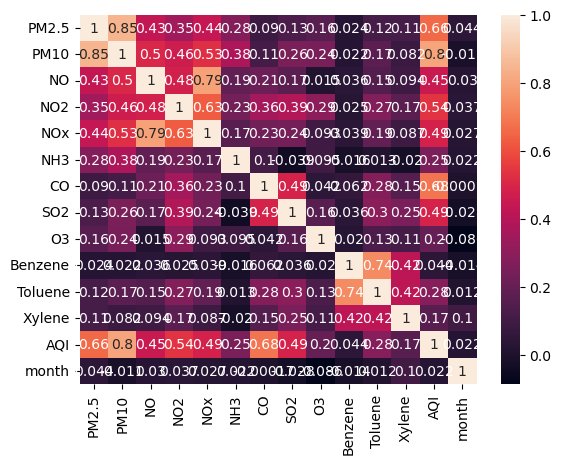

In [510]:
# Checking the correlation
sns.heatmap(df1.corr(),annot=True)

In [511]:
df1.groupby(['City'])['City'].count().index

Index(['Ahmedabad', 'Aizawl', 'Amaravati', 'Amritsar', 'Bengaluru', 'Bhopal',
       'Brajrajnagar', 'Chandigarh', 'Chennai', 'Coimbatore', 'Delhi',
       'Ernakulam', 'Gurugram', 'Guwahati', 'Hyderabad', 'Jaipur',
       'Jorapokhar', 'Kochi', 'Kolkata', 'Lucknow', 'Mumbai', 'Patna',
       'Shillong', 'Talcher', 'Thiruvananthapuram', 'Visakhapatnam'],
      dtype='object', name='City')

In [512]:
df1.groupby(['City'])['City'].count()

City
Ahmedabad             2009
Aizawl                 113
Amaravati              951
Amritsar              1221
Bengaluru             2009
Bhopal                 289
Brajrajnagar           938
Chandigarh             304
Chennai               2009
Coimbatore             386
Delhi                 2009
Ernakulam              162
Gurugram              1679
Guwahati               502
Hyderabad             2006
Jaipur                1114
Jorapokhar            1169
Kochi                  162
Kolkata                814
Lucknow               2009
Mumbai                2009
Patna                 1858
Shillong               310
Talcher                925
Thiruvananthapuram    1112
Visakhapatnam         1462
Name: City, dtype: int64

Q1 - Find the maximum value of PM2.5 for all the cities

In [513]:
city_list = []
for i in df1.groupby(['City'])['City'].count().index:
    print(i)
    print(df1[df1['City']== i]['PM2.5'].max())
    city_list.append(df1[df1['City']== i]['PM2.5'].max())

Ahmedabad
381.69
Aizawl
54.9
Amaravati
139.38
Amritsar
868.66
Bengaluru
313.59
Bhopal
136.42
Brajrajnagar
308.79
Chandigarh
154.85
Chennai
293.43
Coimbatore
63.1
Delhi
685.36
Ernakulam
78.27
Gurugram
949.99
Guwahati
916.67
Hyderabad
571.02
Jaipur
311.35
Jorapokhar
217.13
Kochi
143.85
Kolkata
304.74
Lucknow
742.67
Mumbai
134.32
Patna
645.5
Shillong
917.77
Talcher
354.44
Thiruvananthapuram
98.87
Visakhapatnam
203.05


In [514]:
city_list

[381.69,
 54.9,
 139.38,
 868.66,
 313.59,
 136.42,
 308.79,
 154.85,
 293.43,
 63.1,
 685.36,
 78.27,
 949.99,
 916.67,
 571.02,
 311.35,
 217.13,
 143.85,
 304.74,
 742.67,
 134.32,
 645.5,
 917.77,
 354.44,
 98.87,
 203.05]

In [515]:
city_name = []
for i in df1.groupby(['City'])['City'].count().index:
    city_name.append(i)

In [516]:
city_name

['Ahmedabad',
 'Aizawl',
 'Amaravati',
 'Amritsar',
 'Bengaluru',
 'Bhopal',
 'Brajrajnagar',
 'Chandigarh',
 'Chennai',
 'Coimbatore',
 'Delhi',
 'Ernakulam',
 'Gurugram',
 'Guwahati',
 'Hyderabad',
 'Jaipur',
 'Jorapokhar',
 'Kochi',
 'Kolkata',
 'Lucknow',
 'Mumbai',
 'Patna',
 'Shillong',
 'Talcher',
 'Thiruvananthapuram',
 'Visakhapatnam']

In [517]:
city_max_pm_2_5 = dict(zip(city_name,city_list))
city_max_pm_2_5

{'Ahmedabad': 381.69,
 'Aizawl': 54.9,
 'Amaravati': 139.38,
 'Amritsar': 868.66,
 'Bengaluru': 313.59,
 'Bhopal': 136.42,
 'Brajrajnagar': 308.79,
 'Chandigarh': 154.85,
 'Chennai': 293.43,
 'Coimbatore': 63.1,
 'Delhi': 685.36,
 'Ernakulam': 78.27,
 'Gurugram': 949.99,
 'Guwahati': 916.67,
 'Hyderabad': 571.02,
 'Jaipur': 311.35,
 'Jorapokhar': 217.13,
 'Kochi': 143.85,
 'Kolkata': 304.74,
 'Lucknow': 742.67,
 'Mumbai': 134.32,
 'Patna': 645.5,
 'Shillong': 917.77,
 'Talcher': 354.44,
 'Thiruvananthapuram': 98.87,
 'Visakhapatnam': 203.05}

Text(0, 0.5, 'City Names')

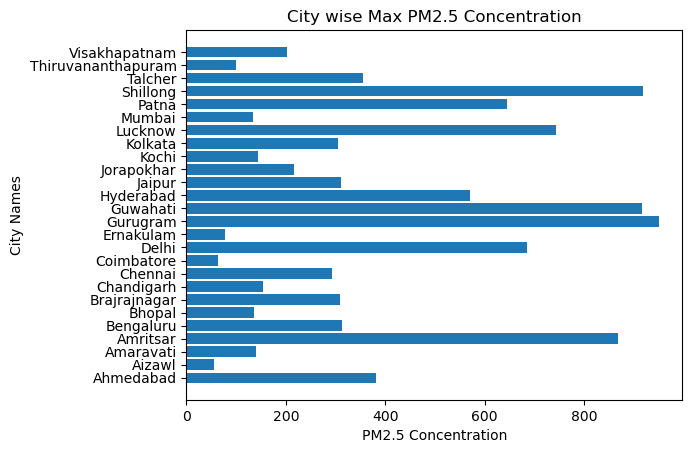

In [518]:
plt.barh(list(city_max_pm_2_5.keys()),list(city_max_pm_2_5.values()))
plt.title("City wise Max PM2.5 Concentration")
plt.xlabel("PM2.5 Concentration")
plt.ylabel("City Names")

In [519]:
df1[df1['City']== 'Gurugram']['PM2.5'].max()

949.99

In [520]:
df1[df1['City']== 'Aizawl']['PM2.5'].max()

54.9

### Out of all the cities available in the dataset, "Gurugram" has the HIGHEST PM2.5 Concentration = 949.99 and "Aizawal" has the LOWEST PM2.5 Concentration = 54.9

In [521]:
df1.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket,month
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN,1
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN,1
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN,1
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN,1
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN,1


###### Coarse (bigger) particles, called PM10, can irritate your eyes, nose, and throat. Dust from roads, farms, dry riverbeds, construction sites, and mines are types of PM10. Fine (smaller) particles, called PM2.5, are more dangerous because they can get into the deep parts of your lungs — or even into your blood.

### For PM2.5 Concentration

In [522]:
# Checking the value for Gurugram for Maximum PM2.5 concentration
df1[df1['City']== 'Gurugram']['PM2.5'].max()

949.99

In [523]:
df1[df1['PM2.5'] == df1[df1['City']== 'Gurugram']['PM2.5'].max()]['month']

13041    8
Name: month, dtype: int64

In August (Monsson Season), Pollution levels can be increased due to the following reasons:

- Increased humidity: The monsoon season is characterized by high humidity levels, which can trap pollutants in the air. The moisture in the air can combine with pollutants, such as dust, smoke, and vehicle emissions, and make them linger in the atmosphere for longer periods, leading to higher pollution levels.

- Stagnant air and reduced wind: During the monsoon season, there is often reduced wind movement and stagnant air conditions. This lack of air movement can prevent the dispersion of pollutants and result in their accumulation in the atmosphere.

- Agricultural activities: The monsoon season coincides with the peak of the agricultural season in many regions. During this time, farmers often engage in activities like crop burning, which releases large amounts of smoke and pollutants into the air, contributing to increased pollution levels.

- Increased vehicular emissions: In some areas, the monsoon season can lead to congested roads and increased traffic due to wet and slippery conditions. This can result in slower traffic flow and prolonged idling, leading to higher emissions from vehicles and subsequently contributing to pollution.

- Industrial emissions: Industries that operate throughout the year may continue to release pollutants during the monsoon season. The damp and stagnant conditions can prevent the dispersion of industrial emissions, leading to increased pollution in the surrounding areas.

In [524]:
df1[df1['PM2.5'] == df1[df1['City']== 'Gurugram']['PM2.5'].max()]['AQI_Bucket']

13041    NaN
Name: AQI_Bucket, dtype: object

In [525]:
df1[df1['PM2.5'] == df1[df1['City']== 'Gurugram']['PM2.5'].max()]['AQI']

13041   NaN
Name: AQI, dtype: float64

In [526]:
df1[df1['PM2.5'] == df1[df1['City']== 'Gurugram']['PM2.5'].max()]['Date']

13041   2017-08-29
Name: Date, dtype: datetime64[ns]

In [527]:
df1[df1['PM2.5'] == df1[df1['City']== 'Gurugram']['PM2.5'].min()]['Date']

13211   2018-02-15
Name: Date, dtype: datetime64[ns]

In [528]:
data_gurugram = df1[df1['City']== 'Gurugram']

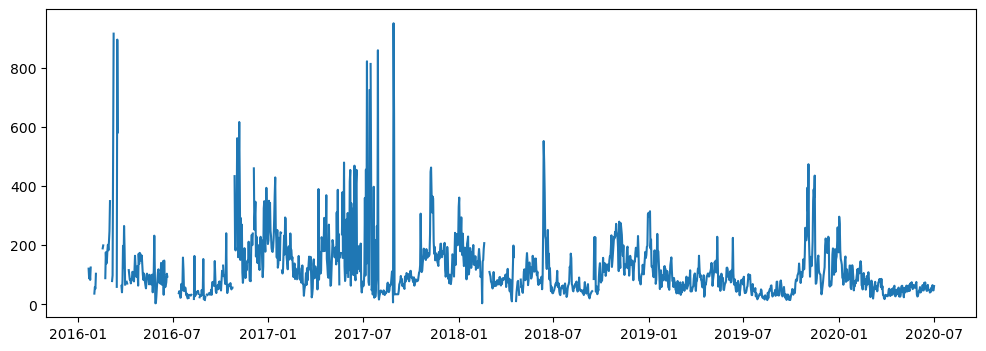

In [529]:
plt.figure(figsize=(12,4))
plt.plot(data_gurugram['Date'], data_gurugram['PM2.5'])

### For PM10 Concentration

In [530]:
df1[df1['City']== 'Gurugram']['PM10'].max()

666.72

In [531]:
# in January Month, we hve the max PM10 COncentration - WINTER SEASON
df1[df1['PM10'] == df1[df1['City']== 'Gurugram']['PM10'].max()]['month']

13184    1
Name: month, dtype: int64

In Winter season, pollution can be increased due to the following reasons:

- Vehicle emissions: Cold weather can affect the efficiency of engines and reduce fuel combustion efficiency in vehicles. This can lead to increased emissions of pollutants such as carbon monoxide (CO), nitrogen oxides (NOx), and volatile organic compounds (VOCs).

- Atmospheric conditions: In winter, atmospheric conditions such as temperature inversions can occur more frequently. Temperature inversions trap pollutants close to the ground, preventing their dispersion and leading to higher pollution levels.

In [532]:
df1[df1['PM10'] == df1[df1['City']== 'Gurugram']['PM10'].max()]['AQI_Bucket']

13184    Very Poor
Name: AQI_Bucket, dtype: object

In [533]:
df1[df1['PM10'] == df1[df1['City']== 'Gurugram']['PM10'].max()]['AQI']

13184    377.0
Name: AQI, dtype: float64

In [534]:
df1.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket,month
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN,1
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN,1
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN,1
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN,1
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN,1


##### Checking the Bucket range for AQI

In [535]:
df1['AQI_Bucket'].value_counts()

Moderate        8829
Satisfactory    8224
Poor            2781
Very Poor       2337
Good            1341
Severe          1338
Name: AQI_Bucket, dtype: int64

In [536]:
print(df1[df1['AQI_Bucket']=='Severe']['AQI'].min())
print(df1[df1['AQI_Bucket']=='Severe']['AQI'].max())

401.0
2049.0


In [537]:
df1[df1['AQI'] == df1[df1['AQI_Bucket']=='Severe']['AQI'].max()]['City']

1145    Ahmedabad
Name: City, dtype: object

In [538]:
df1[df1['AQI'] == df1[df1['AQI_Bucket']=='Severe']['AQI'].max()]['Date']

1145   2018-02-19
Name: Date, dtype: datetime64[ns]

In [539]:
df1[df1['AQI'] == df1[df1['AQI_Bucket']=='Severe']['AQI'].max()]['PM2.5']

1145    242.66
Name: PM2.5, dtype: float64

In [540]:
df1[df1['AQI'] == df1[df1['AQI_Bucket']=='Severe']['AQI'].max()]['PM10']

1145   NaN
Name: PM10, dtype: float64

In [541]:
print(df1[df1['AQI_Bucket']=='Very Poor']['AQI'].min())
print(df1[df1['AQI_Bucket']=='Very Poor']['AQI'].max())

301.0
400.0


In [542]:
print(df1[df1['AQI_Bucket']=='Poor']['AQI'].min())
print(df1[df1['AQI_Bucket']=='Poor']['AQI'].max())

201.0
300.0


In [543]:
print(df1[df1['AQI_Bucket']=='Moderate']['AQI'].min())
print(df1[df1['AQI_Bucket']=='Moderate']['AQI'].max())

101.0
200.0


In [544]:
print(df1[df1['AQI_Bucket']=='Satisfactory']['AQI'].min())
print(df1[df1['AQI_Bucket']=='Satisfactory']['AQI'].max())

51.0
100.0


In [545]:
print(df1[df1['AQI_Bucket']=='Good']['AQI'].min())
print(df1[df1['AQI_Bucket']=='Good']['AQI'].max())

13.0
50.0


In [546]:
# Lowest AQI was found in Odhisa State ( Talcher) which is 13.

In [547]:
df1[df1['AQI'] == df1[df1['AQI_Bucket']=='Good']['AQI'].min()]['City']

26329    Talcher
Name: City, dtype: object

In [548]:
df1[df1['AQI'] == df1[df1['AQI_Bucket']=='Good']['AQI'].min()]['Date']

26329   2018-10-13
Name: Date, dtype: datetime64[ns]

In [549]:
df1[df1['AQI'] == df1[df1['AQI_Bucket']=='Good']['AQI'].min()]['PM2.5']

26329   NaN
Name: PM2.5, dtype: float64

In [550]:
df1[df1['AQI'] == df1[df1['AQI_Bucket']=='Good']['AQI'].min()]['PM10']

26329    0.07
Name: PM10, dtype: float64

##### Checking the box-plot summary

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='PM2.5'>

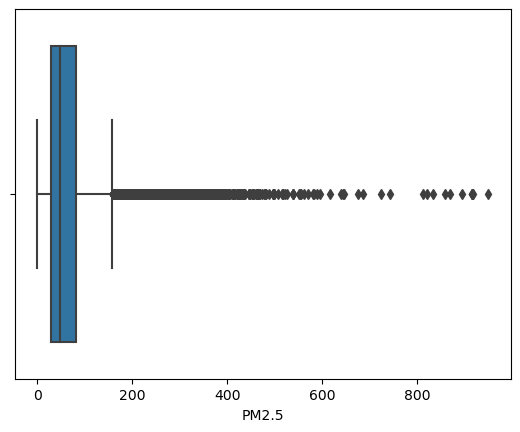

In [551]:
sns.boxplot(df1['PM2.5'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='PM10'>

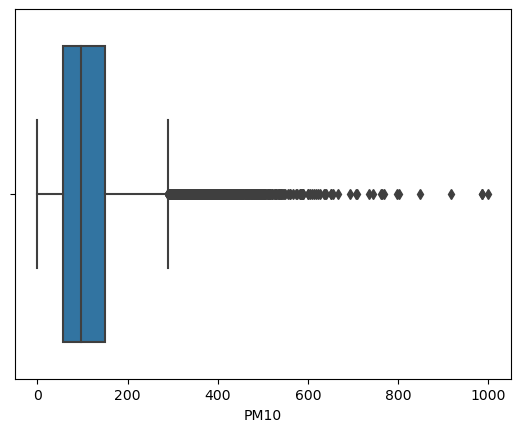

In [552]:
sns.boxplot(df1['PM10'])

#### loading the second dataset

In [553]:
# here this dataset is same as that of first dataset. Only time value is added in the column.

In [554]:
df2 = pd.read_csv('city_hour.csv')
df2.tail()

,City,Datetime,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
707870,Visakhapatnam,2020-06-30 20:00:00,9.50,36.00,2.75,25.57,15.85,4.57,0.62,NaN,27.75,NaN,NaN,NaN,51.0,Satisfactory
707871,Visakhapatnam,2020-06-30 21:00:00,17.25,49.25,3.62,33.20,20.62,3.78,0.76,2.02,25.58,NaN,NaN,NaN,51.0,Satisfactory
707872,Visakhapatnam,2020-06-30 22:00:00,36.00,71.00,2.20,30.80,18.20,3.67,0.58,1.77,26.15,NaN,NaN,NaN,50.0,Good
707873,Visakhapatnam,2020-06-30 23:00:00,15.75,63.00,1.02,28.90,16.00,3.80,0.49,0.75,15.82,NaN,NaN,NaN,50.0,Good
707874,Visakhapatnam,2020-07-01 00:00:00,15.00,66.00,0.40,26.85,14.05,5.20,0.59,2.10,17.05,NaN,NaN,NaN,50.0,Good


In [555]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 707875 entries, 0 to 707874
Data columns (total 16 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   City        707875 non-null  object 
 1   Datetime    707875 non-null  object 
 2   PM2.5       562787 non-null  float64
 3   PM10        411138 non-null  float64
 4   NO          591243 non-null  float64
 5   NO2         590753 non-null  float64
 6   NOx         584651 non-null  float64
 7   NH3         435333 non-null  float64
 8   CO          621358 non-null  float64
 9   SO2         577502 non-null  float64
 10  O3          578667 non-null  float64
 11  Benzene     544229 non-null  float64
 12  Toluene     487268 non-null  float64
 13  Xylene      252046 non-null  float64
 14  AQI         578795 non-null  float64
 15  AQI_Bucket  578795 non-null  object 
dtypes: float64(13), object(3)
memory usage: 86.4+ MB


In [556]:
df2['Datetime'] = pd.to_datetime(df2['Datetime'])

In [557]:
df2['Datetime'].dt.time

0         01:00:00
1         02:00:00
2         03:00:00
3         04:00:00
4         05:00:00
            ...   
707870    20:00:00
707871    21:00:00
707872    22:00:00
707873    23:00:00
707874    00:00:00
Name: Datetime, Length: 707875, dtype: object

In [558]:
df2[df2['City']== 'Gurugram']['PM2.5'].max()

999.99

In [559]:
df2.head()

,City,Datetime,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01 01:00:00,NaN,NaN,1.00,40.01,36.37,NaN,1.00,122.07,NaN,0.0,0.0,0.0,NaN,NaN
1,Ahmedabad,2015-01-01 02:00:00,NaN,NaN,0.02,27.75,19.73,NaN,0.02,85.90,NaN,0.0,0.0,0.0,NaN,NaN
2,Ahmedabad,2015-01-01 03:00:00,NaN,NaN,0.08,19.32,11.08,NaN,0.08,52.83,NaN,0.0,0.0,0.0,NaN,NaN
3,Ahmedabad,2015-01-01 04:00:00,NaN,NaN,0.30,16.45,9.20,NaN,0.30,39.53,153.58,0.0,0.0,0.0,NaN,NaN
4,Ahmedabad,2015-01-01 05:00:00,NaN,NaN,0.12,14.90,7.85,NaN,0.12,32.63,NaN,0.0,0.0,0.0,NaN,NaN


In [560]:
df2[df2['PM2.5'] == df2['PM2.5'].max()][df2['City']== 'Gurugram']['AQI'].max()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_8940\4104319809.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df2[df2['PM2.5'] == df2['PM2.5'].max()][df2['City']== 'Gurugram']['AQI'].max()


966.0

#### Loading the third dataset

In [561]:
df3 = pd.read_csv('Indian Cities Database.csv')
df3.head()

,City,Lat,Long,country,iso2,State
0,Abohar,30.144533,74.195520,India,IN,Punjab
1,Adilabad,19.400000,78.310000,India,IN,Telangana
2,Agartala,23.836049,91.279386,India,IN,Tripura
3,Agra,27.187935,78.003944,India,IN,Uttar Pradesh
4,Ahmadnagar,19.094571,74.738432,India,IN,Maharashtra


In [562]:
df3.shape

(213, 6)

In [563]:
df3.groupby(['State'])['City'].count()

State
Andaman and Nicobar Islands     1
Andhra Pradesh                 15
Arunachal Pradesh               1
Assam                           6
Bihar                           6
Chandigarh                      1
Chhattisgarh                    3
Dadra and Nagar Haveli          1
Daman and Diu                   2
Delhi                           2
Goa                             1
Gujarat                         9
Haryana                        11
Himachal Pradesh                1
Jammu and Kashmir               4
Jharkhand                       4
Karnataka                      15
Kerala                          5
Lakshadweep                     1
Madhya Pradesh                  7
Maharashtra                    18
Manipur                         1
Meghalaya                       1
Mizoram                         1
Nagaland                        1
Odisha                          8
Puducherry                      1
Punjab                          6
Rajasthan                      13
Sikkim  

In [564]:
df3.groupby(['State'])['City'].count().max()

28

In [565]:
df3.groupby(['State'])['City'].count().idxmax()

'Uttar Pradesh'

#### Loading the fourth dataset

In [566]:
df4 = pd.read_csv('station_day.csv')
df4.head()

,StationId,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,AP001,2017-11-24,71.36,115.75,1.75,20.65,12.40,12.19,0.10,10.76,109.26,0.17,5.92,0.10,NaN,NaN
1,AP001,2017-11-25,81.40,124.50,1.44,20.50,12.08,10.72,0.12,15.24,127.09,0.20,6.50,0.06,184.0,Moderate
2,AP001,2017-11-26,78.32,129.06,1.26,26.00,14.85,10.28,0.14,26.96,117.44,0.22,7.95,0.08,197.0,Moderate
3,AP001,2017-11-27,88.76,135.32,6.60,30.85,21.77,12.91,0.11,33.59,111.81,0.29,7.63,0.12,198.0,Moderate
4,AP001,2017-11-28,64.18,104.09,2.56,28.07,17.01,11.42,0.09,19.00,138.18,0.17,5.02,0.07,188.0,Moderate


In [567]:
df5 = pd.read_csv('station_hour.csv')
df5.head()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_8940\1017332218.py:1: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  df5 = pd.read_csv('station_hour.csv')


,StationId,Datetime,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,AP001,2017-11-24 17:00:00,60.50,98.00,2.35,30.80,18.25,8.50,0.1,11.85,126.40,0.1,6.10,0.10,NaN,NaN
1,AP001,2017-11-24 18:00:00,65.50,111.25,2.70,24.20,15.07,9.77,0.1,13.17,117.12,0.1,6.25,0.15,NaN,NaN
2,AP001,2017-11-24 19:00:00,80.00,132.00,2.10,25.18,15.15,12.02,0.1,12.08,98.98,0.2,5.98,0.18,NaN,NaN
3,AP001,2017-11-24 20:00:00,81.50,133.25,1.95,16.25,10.23,11.58,0.1,10.47,112.20,0.2,6.72,0.10,NaN,NaN
4,AP001,2017-11-24 21:00:00,75.25,116.00,1.43,17.48,10.43,12.03,0.1,9.12,106.35,0.2,5.75,0.08,NaN,NaN


In [568]:
df5.shape

(2589083, 16)

#### Loading the fifth dataset

In [569]:
df5.groupby(['StationId'])['StationId'].count().shape

(110,)

In [570]:
df5.isnull().sum()

StationId           0
Datetime            0
PM2.5          647689
PM10          1119252
NO             553711
NO2            528973
NOx            490808
NH3           1236618
CO             499302
SO2            742737
O3             725973
Benzene        861579
Toluene       1042366
Xylene        2075104
AQI            570190
AQI_Bucket     570190
dtype: int64

In [571]:
df6 = pd.read_csv('stations.csv')
df6.head()

,StationId,StationName,City,State,Status
0,AP001,"Secretariat, Amaravati - APPCB",Amaravati,Andhra Pradesh,Active
1,AP002,"Anand Kala Kshetram, Rajamahendravaram - APPCB",Rajamahendravaram,Andhra Pradesh,NaN
2,AP003,"Tirumala, Tirupati - APPCB",Tirupati,Andhra Pradesh,NaN
3,AP004,"PWD Grounds, Vijayawada - APPCB",Vijayawada,Andhra Pradesh,NaN
4,AP005,"GVM Corporation, Visakhapatnam - APPCB",Visakhapatnam,Andhra Pradesh,Active


In [572]:
df6.shape

(230, 5)

In [573]:
df6.groupby(['State'])['StationId'].count()

State
Andhra Pradesh     5
Assam              1
Bihar             10
Chandigarh         1
Delhi             38
Gujarat            6
Haryana           29
Jharkhand          1
Karnataka         20
Kerala             8
Madhya Pradesh    16
Maharashtra       22
Meghalaya          1
Mizoram            1
Odisha             2
Punjab             8
Rajasthan         10
Tamil Nadu         5
Telangana          6
Uttar Pradesh     26
West Bengal       14
Name: StationId, dtype: int64

In [574]:
df6['Status'].value_counts()

Active      131
Inactive      2
Name: Status, dtype: int64

In [575]:
df6.groupby(['State'])['StationId'].count().max()

38

In [576]:
df6.groupby(['State'])['StationId'].count().idxmax()

'Delhi'

In [577]:
data_active = df6[df6['Status']=='Active']

In [578]:
data_active['City'].value_counts()

Delhi                 37
Bengaluru             10
Mumbai                10
Kolkata                7
Patna                  6
Hyderabad              6
Gurugram               4
Faridabad              4
Chennai                4
Lucknow                4
Jaipur                 3
Thiruvananthapuram     2
Bhopal                 1
Sirsa                  1
Sonipat                1
Yamuna Nagar           1
Jorapokhar             1
Coimbatore             1
Amritsar               1
Shillong               1
Aizawl                 1
Panipat                1
Brajrajnagar           1
Talcher                1
Rohtak                 1
Amaravati              1
Panchkula              1
Visakhapatnam          1
Guwahati               1
Chandigarh             1
Ahmedabad              1
Ambala                 1
Bahadurgarh            1
Ballabgarh             1
Bhiwani                1
Dharuhera              1
Fatehabad              1
Hisar                  1
Jind                   1
Kaithal                1


In [579]:
data_active = df6[df6['Status']=='Active']

In [580]:
data_active[data_active['City']=='Delhi']

,StationId,StationName,City,State,Status
17,DL001,"Alipur, Delhi - DPCC",Delhi,Delhi,Active
18,DL002,"Anand Vihar, Delhi - DPCC",Delhi,Delhi,Active
19,DL003,"Ashok Vihar, Delhi - DPCC",Delhi,Delhi,Active
20,DL004,"Aya Nagar, Delhi - IMD",Delhi,Delhi,Active
21,DL005,"Bawana, Delhi - DPCC",Delhi,Delhi,Active
23,DL007,"CRRI Mathura Road, Delhi - IMD",Delhi,Delhi,Active
24,DL008,"DTU, Delhi - CPCB",Delhi,Delhi,Active
25,DL009,"Dr. Karni Singh Shooting Range, Delhi - DPCC",Delhi,Delhi,Active
26,DL010,"Dwarka-Sector 8, Delhi - DPCC",Delhi,Delhi,Active
27,DL011,"East Arjun Nagar, Delhi - CPCB",Delhi,Delhi,Active


In [581]:
list_active_stations = data_active[data_active['City']=='Delhi']['StationId'].values

In [582]:
list_active_stations

array(['DL001', 'DL002', 'DL003', 'DL004', 'DL005', 'DL007', 'DL008',
       'DL009', 'DL010', 'DL011', 'DL012', 'DL013', 'DL014', 'DL015',
       'DL016', 'DL017', 'DL018', 'DL019', 'DL020', 'DL021', 'DL022',
       'DL023', 'DL024', 'DL025', 'DL026', 'DL027', 'DL028', 'DL029',
       'DL030', 'DL031', 'DL032', 'DL033', 'DL034', 'DL035', 'DL036',
       'DL037', 'DL038'], dtype=object)

#### Loading the sixth dataset

In [583]:
df5 = pd.read_csv('station_hour.csv')
df5.head()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_8940\1017332218.py:1: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  df5 = pd.read_csv('station_hour.csv')


,StationId,Datetime,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,AP001,2017-11-24 17:00:00,60.50,98.00,2.35,30.80,18.25,8.50,0.1,11.85,126.40,0.1,6.10,0.10,NaN,NaN
1,AP001,2017-11-24 18:00:00,65.50,111.25,2.70,24.20,15.07,9.77,0.1,13.17,117.12,0.1,6.25,0.15,NaN,NaN
2,AP001,2017-11-24 19:00:00,80.00,132.00,2.10,25.18,15.15,12.02,0.1,12.08,98.98,0.2,5.98,0.18,NaN,NaN
3,AP001,2017-11-24 20:00:00,81.50,133.25,1.95,16.25,10.23,11.58,0.1,10.47,112.20,0.2,6.72,0.10,NaN,NaN
4,AP001,2017-11-24 21:00:00,75.25,116.00,1.43,17.48,10.43,12.03,0.1,9.12,106.35,0.2,5.75,0.08,NaN,NaN


In [584]:
df5[df5['StationId']=='DL001']['PM2.5'].max()

992.0

In [585]:
df5[df5['StationId']=='DL001']['PM10'].max()

991.0

In [586]:
for i in list_active_stations:
    print(i , end = " - ")
    print(df5[df5['StationId']==i]['PM2.5'].max(), end = " - ")
    print(df5[df5['StationId']==i]['PM10'].max())

DL001 - 992.0 - 991.0
DL002 - 985.0 - 1000.0
DL003 - 972.0 - 997.0
DL004 - 954.0 - 983.01
DL005 - 991.0 - 995.0
DL007 - 973.79 - 1000.0
DL008 - 1000.0 - 1000.0
DL009 - 967.5 - 974.0
DL010 - 958.25 - 998.0
DL011 - nan - nan
DL012 - 955.54 - 992.55
DL013 - 994.07 - nan
DL014 - 989.25 - 999.75
DL015 - 1000.0 - 998.0
DL016 - 929.0 - 991.0
DL017 - 986.34 - 996.07
DL018 - 985.75 - 998.0
DL019 - 945.0 - 991.0
DL020 - 988.5 - 994.0
DL021 - 997.51 - nan
DL022 - 907.0 - 998.0
DL023 - 892.0 - 1000.0
DL024 - 1000.0 - 1000.0
DL025 - 987.43 - 999.96
DL026 - 987.0 - 994.0
DL027 - 983.0 - 997.0
DL028 - 988.0 - 988.0
DL029 - 978.0 - 998.0
DL030 - 986.25 - 996.52
DL031 - 985.0 - 998.17
DL032 - 967.0 - 997.0
DL033 - 997.23 - nan
DL034 - 1000.0 - 1000.0
DL035 - 984.0 - 1000.0
DL036 - 992.75 - 935.0
DL037 - 957.25 - 1000.0
DL038 - 969.75 - 1000.0


## Conclusion

In [587]:
#  Most polluted city is Gurguram in terms of PM2.5 concentration= 949.99 in August month (monsoon season)
# in January Month, we hve the max PM10 Concentration = 666.72 in Gurugram in Winter Season

#  Least polluted city is Aizwal in terms of PM2.5 concentration

# Lowest AQI was found in Odhisa State (Talcher) which is 13.

# we have also seen the bucketing range for the AQI values i.e very poor, poor, moderate, good, satisfactory.

# we checked the active station IDs and found maximum number of IDs from "delhi region" and then we calculated the max
# and min of PM2.5 concentration.

## Finished!

***************************************************************************************************************************